In [21]:
import numpy as np
from tenpy.networks.mps import MPS
from tenpy.models.hubbard import FermiHubbardModel
from tenpy.algorithms import dmrg

import pickle
import matplotlib.pyplot as plt

from math import gcd

In [5]:
def run_dmrg_half_filling(L, U, t, mu, chi_max, sweeps, hc_flag=False):
    model_params = {
        'L': L,
        'U': U,
        't':t,
        'mu': mu,
        'bc_MPS': 'finite',
        'bc_x':'periodic',
        'explicit_plus_hc':hc_flag
    }

    model = FermiHubbardModel(model_params)

    # Initialize the MPS for half-filling with an alternating pattern of up and down spins
    initial_state = ['up', 'down'] * (L // 2) if L % 2 == 0 else ['up', 'down'] * (L // 2) + ['up']
    psi = MPS.from_product_state(model.lat.mps_sites(), initial_state, bc='finite')

    dmrg_params = {
        'mixer': True,  # Enables mixing for better convergence in difficult phases
        'trunc_params': {
            'chi_max': chi_max,
            'svd_min': 1.e-10
        },
        'max_sweeps': sweeps,
    }

    eng = dmrg.TwoSiteDMRGEngine(psi, model, dmrg_params)
    E0, psi = eng.run()

    return E0, psi


In [134]:
k_num = 50
chi_max = 300  
sweeps = 100
U = 6
mu = U/2


norb_list = np.array([4, 6, 8, 10, 12, 16])#np.arange(4, 22, 4)
lcm = 120


corr_func_final = np.zeros(shape=(len(norb_list), lcm), dtype=complex)


for ind, norb in enumerate(norb_list):
    corr_func_temp = np.zeros(lcm, dtype=complex)
    for kx in range(-int(k_num/2), int(k_num/2)):
        t_star = np.exp(1j*kx/k_num*np.pi/norb)
        ground_state_energy, gs = run_dmrg_half_filling(norb, U, t_star, mu, chi_max, sweeps)
        #print(ground_state_energy)
        exp_func_k = np.zeros(lcm, dtype=complex)
        for r in range(lcm):
            exp_func_k[r] = gs.expectation_value_term([('Cu', r%norb), ('Cdu', 0)]) * np.exp(1j*kx/k_num*np.pi*r)
        corr_func_temp+=exp_func_k
    corr_func_final[ind, :] = corr_func_temp/k_num
    print(norb)

4
6
8
10
12
16


In [145]:
import pickle

save_dict = {}
save_dict['n_orb_list'] = norb_list
save_dict['corr_funcs_DMRG'] = corr_func_final

with open('Corr_func_DMRG.pkl', 'wb') as file:
    pickle.dump(save_dict, file)

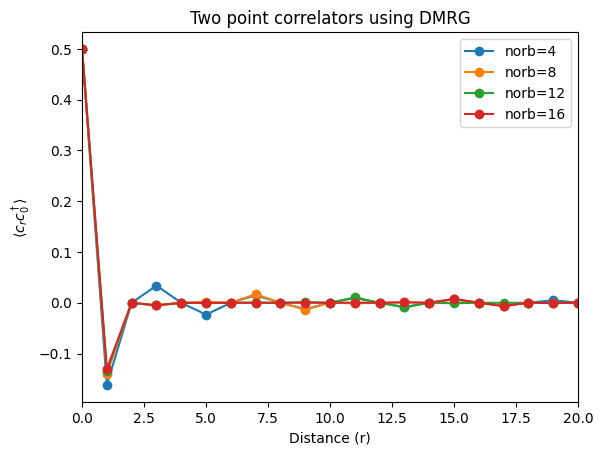

In [146]:

for ind, norb in enumerate(norb_list):
    if norb not in [4, 8, 12, 16]: continue
    plt.plot(np.arange(lcm)[:], corr_func_final[ind, :].real, marker='o', label="norb="+str(norb))

plt.xlim(0, 20)
plt.legend()
#plt.xscale('log')
#x = np.linspace(0, 100)
#y = 0.5*np.exp(-x/12)
#plt.plot(x, y)
#plt.yscale('log')

plt.ylabel(r"$\langle c_r c_0^\dagger\rangle$")
plt.xlabel("Distance (r)")
plt.title("Two point correlators using DMRG")
plt.savefig("Fig3.png")

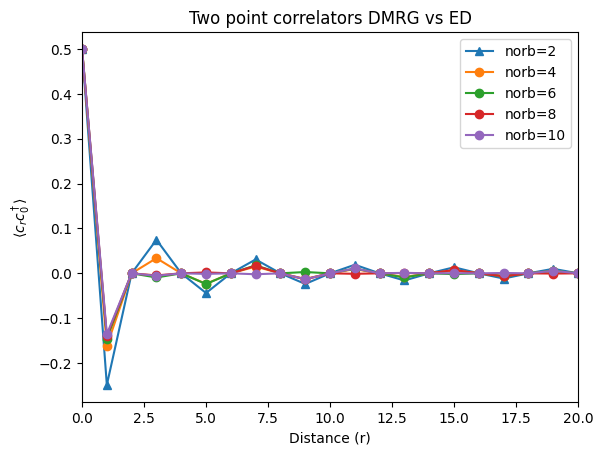

In [147]:
for ind, norb in enumerate([2]):
    plt.plot(np.arange(lcm)[:], corr_func_ED[ind, :].real, marker='^', label="norb="+str(norb))

for ind, norb in enumerate(norb_list):
    if norb not in [4, 6, 8, 10]: continue
    plt.plot(np.arange(lcm)[:], corr_func_final[ind, :].real, marker='o', label="norb="+str(norb))





plt.legend()

plt.xlim(0, 20)

plt.ylabel(r"$\langle c_r c_0^\dagger\rangle$")
plt.xlabel("Distance (r)")
plt.title("Two point correlators DMRG vs ED")
plt.savefig("Fig2.png")

In [139]:
corr_func_ED = np.array([[ 5.00000004e-01+0.00000000e+00j, -2.48628677e-01+6.85994327e-03j,
         1.14008610e-09+4.71844785e-18j,  7.48048321e-02-6.85994327e-03j,
         9.27378846e-09+4.99600361e-18j, -4.38426293e-02+6.85994327e-03j,
         4.50412166e-09-2.05391260e-17j,  3.08880162e-02-6.85994327e-03j,
         1.88954712e-09+1.66533454e-18j, -2.37063318e-02+6.85994327e-03j,
         3.26164727e-09-6.66133815e-18j,  1.91060668e-02-6.85994327e-03j,
        -4.86069532e-10+4.44089210e-18j, -1.58838578e-02+6.85994327e-03j,
         4.74300444e-09-4.44089210e-18j,  1.34838778e-02-6.85994327e-03j,
        -5.24906595e-09+5.55111512e-18j, -1.16135810e-02+6.85994327e-03j,
         4.99247629e-09-1.11022302e-17j,  1.01041340e-02-6.85994327e-03j,
        -4.45374003e-09+1.44328993e-17j, -8.85118230e-03+6.85994327e-03j,
         2.75360321e-09-4.88498131e-17j,  7.78667212e-03-6.85994327e-03j,
        -6.85248667e-09+1.55431223e-17j, -6.86425638e-03+6.85994327e-03j,
        -1.01077119e-09+2.22044605e-17j,  6.05123422e-03-6.85994327e-03j,
        -4.33505400e-09+1.55431223e-17j, -5.32379602e-03+6.85994327e-03j,
        -2.06955434e-09-5.44009282e-17j,  4.66415820e-03-6.85994327e-03j,
        -1.81489912e-10+2.10942375e-17j, -4.05868268e-03+6.85994327e-03j,
        -2.34273786e-09+1.55431223e-17j,  3.49670425e-03-6.85994327e-03j,
        -1.67621219e-09+2.10942375e-17j, -2.96966926e-03+6.85994327e-03j,
        -6.30127520e-09-5.77315973e-17j,  2.47060802e-03-6.85994327e-03j,
         8.77461774e-10+2.44249065e-17j, -1.99367761e-03+6.85994327e-03j,
         3.95341884e-10+1.11022302e-17j,  1.53387900e-03-6.85994327e-03j,
         1.52374352e-09+9.82547377e-17j, -1.08685873e-03+6.85994327e-03j,
        -2.91338481e-09-6.32827124e-17j,  6.48665765e-04-6.85994327e-03j,
         1.32833521e-10+2.88657986e-17j, -2.15651270e-04+6.85994327e-03j,
         5.96046448e-10+4.91096652e-18j, -2.15651815e-04-6.85994327e-03j,
         1.32833734e-10-3.94129174e-17j,  6.48666448e-04+6.85994327e-03j,
        -2.91338429e-09-6.85562718e-17j, -1.08685952e-03-6.85994327e-03j,
         1.52374310e-09+3.44169138e-17j,  1.53387904e-03+6.85994327e-03j,
         3.95341813e-10+5.55111512e-19j, -1.99367769e-03-6.85994327e-03j,
         8.77461385e-10+1.07691633e-16j,  2.47060872e-03+6.85994327e-03j,
        -6.30127516e-09-7.43849426e-17j, -2.96966989e-03-6.85994327e-03j,
        -1.67621152e-09+3.88578059e-17j,  3.49670424e-03+6.85994327e-03j,
        -2.34273882e-09-3.33066907e-18j, -4.05868305e-03-6.85994327e-03j,
        -1.81488672e-10-2.88657986e-17j,  4.66415901e-03+6.85994327e-03j,
        -2.06955394e-09-7.88258347e-17j, -5.32379612e-03-6.85994327e-03j,
        -4.33505443e-09+4.77395901e-17j,  6.05123371e-03+6.85994327e-03j,
        -1.01077100e-09-9.99200722e-18j, -6.86425615e-03-6.85994327e-03j,
        -6.85248631e-09+1.13242749e-16j,  7.78667193e-03+6.85994327e-03j,
         2.75360246e-09-8.43769499e-17j, -8.85118260e-03-6.85994327e-03j,
        -4.45374031e-09+4.99600361e-17j,  1.01041348e-02+6.85994327e-03j,
         4.99247657e-09-1.53210777e-16j, -1.16135817e-02-6.85994327e-03j,
        -5.24906632e-09-1.99840144e-17j,  1.34838775e-02+6.85994327e-03j,
         4.74300484e-09-1.02140518e-16j, -1.58838567e-02-6.85994327e-03j,
        -4.86069897e-10+1.99840144e-16j,  1.91060666e-02+6.85994327e-03j,
         3.26164605e-09-1.44328993e-17j, -2.37063317e-02-6.85994327e-03j,
         1.88954864e-09+1.22124533e-16j,  3.08880157e-02+6.85994327e-03j,
         4.50412093e-09+4.99600361e-17j, -4.38426290e-02-6.85994327e-03j,
         9.27378868e-09+5.35682609e-17j,  7.48048320e-02+6.85994327e-03j,
         1.14008535e-09-1.68198788e-16j, -2.48628677e-01-6.85994327e-03j,
         5.00000004e-01-9.82193303e-18j, -2.48628677e-01+6.85994327e-03j,
         1.14008709e-09-1.04916076e-16j,  7.48048321e-02-6.85994327e-03j,
         9.27378806e-09-7.63278329e-17j, -4.38426293e-02+6.85994327e-03j,
         4.50412237e-09-2.72004641e-17j,  3.08880162e-02-6.85994327e-03j,
         1.88954612e-09+1.34336986e-16j, -2.37063318e-02+6.85994327e-03j,
         3.26164759e-09+4.10782519e-17j,  1.91060668e-02-6.85994327e-03j,
        -4.86069456e-10+7.21644966e-17j, -1.58838578e-02+6.85994327e-03j,
         4.74300455e-09-1.78745907e-16j,  1.34838778e-02-6.85994327e-03j,
        -5.24906612e-09+1.11022302e-18j, -1.16135810e-02+6.85994327e-03j,
         4.99247644e-09-1.07691633e-16j,  1.01041340e-02-6.85994327e-03j],
       [ 4.99999989e-01+0.00000000e+00j, -1.61794353e-01+3.49077374e-03j,
        -3.33859762e-10-4.86155916e-11j,  3.38024499e-02-3.49077314e-03j,
         3.49270065e-09-2.22044605e-18j, -2.33399137e-02+3.49077374e-03j,
        -1.70415217e-10-4.86155916e-11j,  1.49683804e-02-3.49077314e-03j,
         3.72503304e-09+3.33066907e-18j, -1.24228680e-02+3.49077374e-03j,
         2.04949498e-10-4.86155916e-11j,  9.42474220e-03-3.49077314e-03j,
         2.36985260e-09+1.44328993e-17j, -8.26739052e-03+3.49077374e-03j,
        -2.07340889e-10-4.86155916e-11j,  6.69948553e-03-3.49077314e-03j,
         2.96819099e-09+8.88178420e-18j, -6.02455996e-03+3.49077374e-03j,
         3.85740078e-11-4.86155916e-11j,  5.03746385e-03-3.49077314e-03j,
        -1.15193354e-08+1.33226763e-17j, -4.58433568e-03+3.49077374e-03j,
         1.80455467e-10-4.86155916e-11j,  3.88785017e-03-3.49077314e-03j,
         7.53801862e-10+1.55431223e-17j, -3.55387472e-03+3.49077374e-03j,
         2.45576665e-10-4.86155916e-11j,  3.02178769e-03-3.49077314e-03j,
        -3.69130580e-09+1.66533454e-17j, -2.75822493e-03+3.49077374e-03j,
         2.48433132e-10-4.86155916e-11j,  2.32644227e-03-3.49077314e-03j,
        -1.68405979e-10+1.99840144e-17j, -2.10697316e-03+3.49077374e-03j,
         1.36030613e-10-4.86155916e-11j,  1.73907879e-03-3.49077314e-03j,
        -2.72137650e-09+2.33146835e-17j, -1.54799369e-03+3.49077374e-03j,
        -1.58544140e-11-4.86155916e-11j,  1.22126314e-03-3.49077314e-03j,
        -2.18973247e-09+2.44249065e-17j, -1.04830929e-03+3.49077374e-03j,
        -6.84670847e-11-4.86155916e-11j,  7.47275156e-04-3.49077314e-03j,
         1.46714688e-09+9.88098492e-17j, -5.85145718e-04+3.49077374e-03j,
         1.15305565e-11-4.86155916e-11j,  2.98244138e-04-3.49077314e-03j,
         3.72529006e-09+2.94209102e-17j, -1.41195230e-04+3.49077374e-03j,
         1.43150593e-10-4.86155916e-11j, -1.41192789e-04-3.49077314e-03j,
         3.72529028e-09-3.88578059e-17j,  2.98244463e-04+3.49077374e-03j,
         8.69886786e-11-4.86155916e-11j, -5.85147374e-04-3.49077314e-03j,
         1.46714645e-09+3.38618023e-17j,  7.47271790e-04+3.49077374e-03j,
         1.26433611e-10-4.86155916e-11j, -1.04830376e-03-3.49077314e-03j,
        -2.18973285e-09+1.07691633e-16j,  1.22125974e-03+3.49077374e-03j,
        -1.99164393e-10-4.86155916e-11j, -1.54799040e-03-3.49077314e-03j,
        -2.72137583e-09+3.88578059e-17j,  1.73907925e-03+3.49077374e-03j,
         1.64873569e-10-4.86155916e-11j, -2.10697563e-03-3.49077314e-03j,
        -1.68404741e-10-2.99760217e-17j,  2.32644354e-03+3.49077374e-03j,
         1.66457446e-10-4.86155916e-11j, -2.75822493e-03-3.49077314e-03j,
        -3.69130623e-09+4.55191440e-17j,  3.02179150e-03+3.49077374e-03j,
        -1.23190297e-10-4.86155916e-11j, -3.55387501e-03-3.49077314e-03j,
         7.53802220e-10+1.15463195e-16j,  3.88785016e-03+3.49077374e-03j,
        -3.64399992e-10-4.86155916e-11j, -4.58433632e-03-3.49077314e-03j,
        -1.15193357e-08+4.66293670e-17j,  5.03746365e-03+3.49077374e-03j,
         8.64230313e-11-4.86155916e-11j, -6.02456129e-03-3.49077314e-03j,
         2.96819063e-09-2.10942375e-17j,  6.69948151e-03+3.49077374e-03j,
        -3.36770180e-11-4.86155916e-11j, -8.26738939e-03-3.49077314e-03j,
         2.36985222e-09+1.98729921e-16j,  9.42474511e-03+3.49077374e-03j,
         2.95101348e-11-4.86155916e-11j, -1.24228666e-02-3.49077314e-03j,
         3.72503457e-09+1.33781874e-16j,  1.49683842e-02+3.49077374e-03j,
         1.25935280e-10-4.86155916e-11j, -2.33399138e-02-3.49077314e-03j,
         3.49270087e-09+7.18869408e-17j,  3.38024490e-02+3.49077374e-03j,
        -3.11864235e-10-4.86155916e-11j, -1.61794356e-01-3.49077314e-03j,
         4.99999989e-01-9.82193303e-18j, -1.61794353e-01+3.49077374e-03j,
        -3.33859762e-10-4.86155916e-11j,  3.38024499e-02-3.49077314e-03j,
         3.49270028e-09-7.91033905e-17j, -2.33399137e-02+3.49077374e-03j,
        -1.70415217e-10-4.86155916e-11j,  1.49683804e-02-3.49077314e-03j,
         3.72503205e-09+1.31561428e-16j, -1.24228680e-02+3.49077374e-03j,
         2.04949498e-10-4.86155916e-11j,  9.42474220e-03-3.49077314e-03j,
         2.36985267e-09+6.66133815e-17j, -8.26739052e-03+3.49077374e-03j,
        -2.07340889e-10-4.86155916e-11j,  6.69948553e-03-3.49077314e-03j,
         2.96819083e-09+2.22044605e-18j, -6.02455996e-03+3.49077374e-03j,
         3.85740078e-11-4.86155916e-11j,  5.03746385e-03-3.49077314e-03j]])

In [114]:
corr_func_final[0,:]

array([ 5.00000000e-01+0.00000000e+00j, -1.34721263e-01-2.72564105e-03j,
       -2.61991704e-17-6.20677175e-18j, -2.55385135e-02+1.12899749e-03j,
        3.18205160e-01-1.00000000e-02j, -1.61029267e-01+1.12899749e-03j,
       -6.45747096e-17-6.20677175e-18j,  4.55891538e-02-2.72564105e-03j,
        3.23074900e-16-5.55111512e-18j, -7.55426828e-02+2.72564105e-03j,
       -5.75112099e-17+6.20677175e-18j,  3.11488771e-02-1.12899749e-03j,
       -1.05788950e-01+1.00000000e-02j,  1.68894087e-02-1.12899749e-03j,
       -1.38537683e-18+6.20677175e-18j, -4.41942464e-03+2.72564105e-03j,
       -7.57172103e-16+6.93889390e-18j,  2.66293611e-02-2.72564105e-03j,
        1.03299390e-17-6.20677175e-18j, -4.20632985e-03+1.12899749e-03j,
        6.31375151e-02-1.00000000e-02j, -1.10227391e-02+1.12899749e-03j,
       -4.34661000e-17-6.20677175e-18j,  1.02497623e-02-2.72564105e-03j,
       -3.99680289e-16-9.99200722e-18j, -1.82080945e-02+2.72564105e-03j,
       -6.69635863e-17+6.20677175e-18j,  4.38653312